

<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Entrega 3 - Proyecto FInal </p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
    
Técnicas de Inteligencia Artificial - Visión de Máquina </p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
  <br>Est. Brian Camilo Valencia Peña (bcvalenciap@unal.edu.co)
  <br>Est. Esteban Ladino Fajardo (eladinof@unal.edu.co)
</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRÓNICA Y ELECTRÓNICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="../figs/Escudo_UN.png",width=100,height=100>

<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>28 de Junio de 2022</p>

In [33]:
# Librerias
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats as st
from scipy.cluster import vq
from matplotlib.colors import ListedColormap
import time as t
print ("OpenCV Version : %s " % cv2.__version__)
from scipy import signal
from scipy import misc
from sklearn import neighbors, datasets
import getopt
import sys
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline


OpenCV Version : 4.6.0 


## Aplicación de algoritmos de calsificación supervisado
Detección de Cacao enfermo o sano, muestras de color rojo y amarillo. Algoritmo K-vecinos mas cercanos.


In [34]:
# importación de características y datos de procesamiento
Xpoblacional=np.load('../data/caracteristicasNormalizadasPCA.npy')
imagenesProcesadas=np.load('../data/listaImagenesProcesadas.npy')  #Arreglo de pertenencia a clases del dataset 0=sana 1=moniia 2=fito
nombreCaracteristicas=np.load('../data/nombreCaracteristicasNormalizadasPCA.npy')

print(f'Dimensiones de caractarísticas:{Xpoblacional.shape}')

#print(f'Imágenes procesadas:\n {imagenesProcesadas}')
#print(f'Nombre de características finales\n{nombreCaracteristicas}')
#print(f'caracteristicasNormalizadasPCA\n{Xpoblacional}')

#Generación de tabla con caracterisitcas y valores para cada imagen del dataset
datasetinput = pd.DataFrame(Xpoblacional, columns = nombreCaracteristicas)
pd.set_option("display.max_rows", None)
datasetinput



Dimensiones de caractarísticas:(136, 17)


,Moda R,Media R,Media G,Media B,Media Gris,máximo R,máximo G,máximo B,máximo Gris,Momento HU 1,Momento HU 2,Momento HU 3,Momento HU 4,Momento HU 5,Momento HU 6,Momento HU 7,Redondez
0,0.003922,0.363162,0.348868,0.314146,0.334623,0.949020,0.941176,0.882353,0.937255,0.181905,0.105386,5.461480e-02,2.327006e-02,0.004066,0.015774,0.085357,0.410561
1,0.003922,0.604723,0.537194,0.531159,0.526411,1.000000,0.894118,0.937255,0.921569,0.143875,0.091520,5.777504e-03,5.705123e-04,0.003003,0.008353,0.084866,0.521678
2,0.003922,0.735281,0.643212,0.655901,0.623955,1.000000,0.968627,0.945098,0.972549,0.145442,0.061851,2.971320e-02,1.154738e-03,0.002995,0.008177,0.084868,0.418590
3,0.003922,0.669609,0.507003,0.574396,0.513377,1.000000,0.988235,1.000000,0.976471,1.000000,1.000000,5.796902e-01,1.000000e+00,1.000000,1.000000,0.247239,0.266844
4,0.003922,0.515397,0.408786,0.431364,0.420381,0.972549,0.898039,0.858824,0.878431,0.018490,0.000680,1.086071e-02,1.034570e-03,0.003000,0.008482,0.084865,0.304206
5,0.003922,0.384200,0.328401,0.320590,0.326816,0.890196,0.921569,0.890196,0.905882,0.181248,0.045027,4.705085e-02,8.489130e-04,0.002997,0.008412,0.084868,0.129732
6,0.003922,0.393058,0.268975,0.298284,0.292503,0.901961,0.941176,0.945098,0.929412,0.263115,0.155073,1.679788e-02,2.237418e-02,0.003573,0.017289,0.084812,0.204250
7,0.003922,0.146021,0.103467,0.064321,0.105414,0.556863,0.552941,0.533333,0.552941,0.184032,0.100733,4.068484e-02,1.128885e-02,0.003053,0.007923,0.084245,0.286535
8,0.003922,0.464134,0.403133,0.274666,0.380340,1.000000,0.988235,0.972549,0.988235,0.042176,0.027964,4.628329e-03,4.743408e-04,0.003003,0.008423,0.084867,0.769845
9,0.003922,0.434143,0.375000,0.238050,0.344216,0.870588,0.823529,0.839216,0.811765,0.073620,0.036913,1.320506e-02,2.183788e-03,0.002992,0.008060,0.084848,0.358363


In [35]:
print(imagenesProcesadas)

['monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia'
 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia'
 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia'
 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia'
 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia'
 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia'
 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia'
 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'fito' 'fito' 'fito'
 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito'
 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito'
 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito'
 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito'
 'fito' 'fito' 'saludable' 'saludable' 'saludable' 'saludable' 'saludable'
 'saludable' 'saludable' 'saludable' 'saludable' 'saludable' 'saludable'

In [36]:
#Generación de tabla con estado del fruto de la imagen y valores de clase para cada imagen del dataset
datasetclase=[]
for i in imagenesProcesadas:
    if i=='fito':
        datasetclase.append(2)

    elif i=='monilia':
        datasetclase.append(1)

    else :
        datasetclase.append(0)

#    datasetclase =[1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0] #Arreglo de pertenencia a clases del dataset 0=sana 1=moniia 2=fito
#print(datasetclase)
datasetclaseframe = pd.DataFrame({'enfermedad':imagenesProcesadas,'clase':datasetclase})
datasetclaseframe

,enfermedad,clase
0,monilia,1
1,monilia,1
2,monilia,1
3,monilia,1
4,monilia,1
5,monilia,1
6,monilia,1
7,monilia,1
8,monilia,1
9,monilia,1


En esta ocasión se va a clasificar si el cacao está o no enfermo. 0=sana 1=moniia 2=fito

In [37]:
X = datasetinput.iloc[:,:].values
y = datasetclaseframe.iloc[:,1].values
#X
#y

Ahora separamos los datos en con sub conjuntos, entrenamiento y prueba, dejando el 25% de los registros para prueba y el 75% para entrenamiento, posteriormente ajustamos las escalas.

In [38]:
#Segmentación de datos para entremaiento y validación 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#Dan 22 de prueba y 8 de validación

# Ajuste de escalas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Conjunto de entrenamiento y conjunto de prueba con ajuste de escalas
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#X_train
y_train



array([1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2,
       2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0, 1, 0,
       2, 2, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 0, 1], dtype=int64)

Ahora entrenamos el modelo y predecimos el conjunto X_test. El modelo para el algoritmo KNN lo obtenemos de la clase KNeighborsClassifier de la librería sklearn

Finalmente obtenemos los datos de clasificación a través de la matriz de confusión, en donde los valores verdaderos positivos van por la diagonal y los otros elementos son falsos negativos 

<br>
<img src="../figs/confusionmetrix2.png", width=70%>


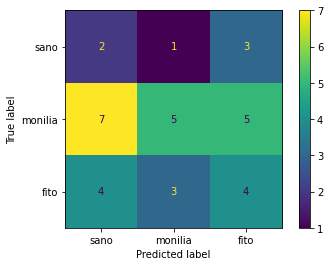

In [39]:
# Entrenamiento del modelo KNN
# n_neighbors = numero de vecinos cercanos a tener en cuenta en el algoritmo
# mectrica minkowski = distancia euclidiana

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicción del conjunto de prueba intentando clasificar x_test
y_pred = classifier.predict(X_test)

# Matriz de confusion
# recordar que y_test son los datos ciertos de salida para x_test mientrass qeu y_pred son los datos predichos por modelo para x_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=["sano","monilia","fito"]).plot()



In [40]:
cm
# EFECTIVIDAD DEL 50%
# Visualizacion de los datos de pruebas
## REFERENCIAS
#https://www.youtube.com/watch?v=RBw3hRJmX7I
#https://www.jacobsoft.com.mx/es_mx/k-nearest-neighbors/

array([[2, 1, 3],
       [7, 5, 5],
       [4, 3, 4]], dtype=int64)

## Aplicación de algoritmos de calsificación NO supervisado
Detección de Cacao enfermo o sano, muestras de color rojo y amarillo. Algoritmo K-Means.


In [41]:
# Librerias
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats as st
from scipy.cluster import vq
from matplotlib.colors import ListedColormap
import time as t
print ("OpenCV Version : %s " % cv2.__version__)
from scipy import signal
from scipy import misc
from sklearn.cluster import KMeans
import getopt
import sys
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline


OpenCV Version : 4.6.0 


In [42]:
# importación de características y datos de procesamiento
Xpoblacional=np.load('../data/caracteristicasNormalizadasPCA.npy')
imagenesProcesadas=np.load('../data/listaImagenesProcesadas.npy')  #Arreglo de pertenencia a clases del dataset 0=sana 1=moniia 2=fito
nombreCaracteristicas=np.load('../data/nombreCaracteristicasNormalizadasPCA.npy')

print(f'Dimensiones de caractarísticas:{Xpoblacional.shape}')

#print(f'Imágenes procesadas:\n {imagenesProcesadas}')
#print(f'Nombre de características finales\n{nombreCaracteristicas}')
#print(f'caracteristicasNormalizadasPCA\n{Xpoblacional}')

#Generación de tabla con caracterisitcas y valores para cada imagen del dataset
datasetinput = pd.DataFrame(Xpoblacional, columns = nombreCaracteristicas)
pd.set_option("display.max_rows", None)
#datasetinput.describe()


Dimensiones de caractarísticas:(136, 17)


c:\Users\BrianCamiloValenciaP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

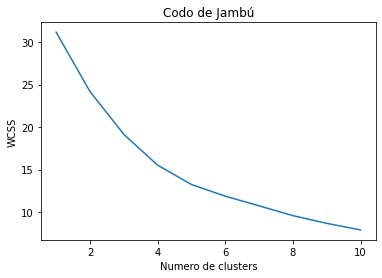

In [43]:
#Codo de Jambu
wcss =[]
for i in range (1,11):
    kmeans = KMeans (n_clusters=i, max_iter=300)
    kmeans.fit(datasetinput)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Numero de clusters")
plt.ylabel("WCSS")
plt.show

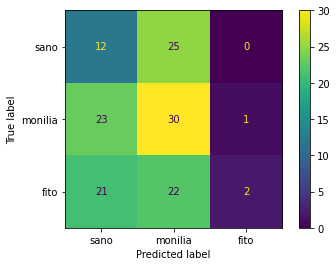

In [53]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(datasetinput)
datasetinput['KMenasCluster']= clustering.labels_
#datasetinput


# Matriz de confusion
# recordar que y_test son los datos ciertos de salida para x_test mientrass qeu y_pred son los datos predichos por modelo para x_test
from sklearn.metrics import confusion_matrix
ma = confusion_matrix(y, clustering.labels_)
cm_display = ConfusionMatrixDisplay(ma,display_labels=["sano","monilia","fito"]).plot()

